In [1]:
import pandas as pd

In [88]:
# dataframe
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries = countries.set_index('country') # 인덱스 지정
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


---

<div class="alert alert-success">
    <b>EXERCISE</b>: 인구밀도를 의미하는 `density` 칼럼을 추가하세요. (주의: 현재 'population' 칼럼은 100만 단위로 표기되어 있습니다)  
  
</div>

In [89]:
countries['population'] = countries['population']*1000000

In [90]:
countries['population']

country
Belgium           11300000.0
France            64300000.0
Germany           81300000.0
Netherlands       16900000.0
United Kingdom    64900000.0
Name: population, dtype: float64

In [91]:
countries.head()

,population,area,capital
country,,,
Belgium,11300000.0,30510,Brussels
France,64300000.0,671308,Paris
Germany,81300000.0,357050,Berlin
Netherlands,16900000.0,41526,Amsterdam
United Kingdom,64900000.0,244820,London


In [92]:
countries['destiny'] = countries.apply(lambda x: (x['population']/x['area']), axis=1)

In [93]:
countries.head()

,population,area,capital,destiny
country,,,,
Belgium,11300000.0,30510,Brussels,370.370370
France,64300000.0,671308,Paris,95.783158
Germany,81300000.0,357050,Berlin,227.699202
Netherlands,16900000.0,41526,Amsterdam,406.973944
United Kingdom,64900000.0,244820,London,265.092721


In [94]:
countries.index

Index(['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'], dtype='object', name='country')

In [95]:
countries['destiny'].value_counts()

destiny
370.370370    1
95.783158     1
227.699202    1
406.973944    1
265.092721    1
Name: count, dtype: int64

In [96]:
countries['destiny'].unique()

array([370.37037037,  95.78315766, 227.69920179, 406.97394404,
       265.09272118])

<div class="alert alert-success">
    <b>EXERCISE</b>: 인구밀도가 300을 초과하는 국가(country)의 수도(capital)과 인구(population)을 선택해주세요.  
  
</div>

In [97]:
high_destiny_countries = countries[countries['destiny'] > 300]
result = high_destiny_countries[['capital', 'population']]
print(result)

               capital  population
country                           
Belgium       Brussels  11300000.0
Netherlands  Amsterdam  16900000.0


In [145]:
# 방법2
countries.loc[countries['destiny'] > 300, ['capital', 'population']]

,capital,population
country,,
Belgium,Brussels,11300000.0
Netherlands,Amsterdam,16900000.0


<div class="alert alert-success">
    <b>EXERCISE</b>: 'density_ratio' 칼럼을 추가해주세요. (density_ratio = 인구밀도/평균 인구밀도)
</div>

In [98]:
hap = 0
for mean_destiny in countries['destiny']:
    hap += mean_destiny
mean_price = hap / 5

In [99]:
mean_price

273.1838790074409

In [136]:
countries['destiny_ratio'] = countries.apply(lambda x: (x['destiny']/mean_price), axis=1)

In [149]:
countries.head()

,population,area,capital,destiny,destiny_ratio
country,,,,,
Belgium,11300000.0,30510,Brussels,370.370370,1.355755
France,64300000.0,671308,Paris,95.783158,0.350618
Germany,81300000.0,357050,Berlin,227.699202,0.833502
Netherlands,16900000.0,41526,Amsterdam,406.973944,1.489744
United Kingdom,64900000.0,244820,London,265.092721,0.970382


<div class="alert alert-success">
    <b>EXERCISE</b>: 영국(United Kingdom)의 수도(capital)를 'Cambridge'로 변경해주세요.
</div>

In [150]:
countries['capital'] = countries['capital'].replace('London', 'Cambridge')

In [151]:
countries.head()

,population,area,capital,destiny,destiny_ratio
country,,,,,
Belgium,11300000.0,30510,Brussels,370.370370,1.355755
France,64300000.0,671308,Paris,95.783158,0.350618
Germany,81300000.0,357050,Berlin,227.699202,0.833502
Netherlands,16900000.0,41526,Amsterdam,406.973944,1.489744
United Kingdom,64900000.0,244820,Cambridge,265.092721,0.970382


In [106]:
countries.index

Index(['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'], dtype='object', name='country')

<div class="alert alert-success">
    <b>EXERCISE</b>: 인구 밀도가 100 초과, 300 미만인 국가들을 표시해주세요.  
</div>

In [109]:
condition1 = countries['destiny'] > 100
condition2 = countries['destiny'] < 300

up_destiny_countries = countries[condition1 & condition2]
result1 = up_destiny_countries.index
print(result1)

Index(['Germany', 'United Kingdom'], dtype='object', name='country')


<div class="alert alert-success">
    <b>EXERCISE</b>: 수도가 7글자 이상인 국가들을 표시해주세요. (힌트: string의 len( )를 사용하세요.)
</div>

In [114]:
countries['capital']

country
Belgium            Brussels
France                Paris
Germany              Berlin
Netherlands       Amsterdam
United Kingdom       London
Name: capital, dtype: object

In [146]:
for seven_capital in countries['capital']:
    if len(seven_capital) >= 7:
        print(seven_capital)
    else:
        print("7글자 안 됨")

Brussels
7글자 안 됨
7글자 안 됨
Amsterdam
7글자 안 됨


<div class="alert alert-success">
    <b>EXERCISE</b>: 수도에 'am' 이 포함되는 국가들을 표시해주세요. (힌트: string의 contains( )를 사용하세요.)
</div>

In [119]:
for index, capital in countries['capital'].items():
    if "am" in capital.lower():  # 대소문자 구분 없이 'am'이 포함되어 있는지 확인
        print(f"Index {index}: '{capital}' contains 'am'")
    else:
        print(f"Index {index}: '{capital}' does not contain 'am'")

Index Belgium: 'Brussels' does not contain 'am'
Index France: 'Paris' does not contain 'am'
Index Germany: 'Berlin' does not contain 'am'
Index Netherlands: 'Amsterdam' contains 'am'
Index United Kingdom: 'London' does not contain 'am'


# 영화리뷰 데이터에서 자료 찾기

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [157]:
data = pd.read_csv("./movie_title_data.tsv", sep='\t')
data.head()

C:\Users\5-07\AppData\Local\Temp\ipykernel_12476\676314541.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./movie_title_data.tsv", sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


<div class="alert alert-success">
    <b>EXERCISE</b>: titles 데이터프레임에는 몇 개의 영화가 기록되어 있나요?
</div>

In [153]:
# 8407399개
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8407399 entries, 0 to 8407398
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 577.3+ MB


In [154]:
data.isna().sum()

tconst             0
titleType          0
primaryTitle      14
originalTitle     14
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            10
dtype: int64

In [158]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8407375 entries, 0 to 8407398
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 641.4+ MB


In [159]:
data['primaryTitle'].nunique()

4000736

<div class="alert alert-success">
    <b>EXERCISE</b>: titles에서 가장 빠른 시기에 제작된 영화 두 개를 표시하세요.  힌트: .sort_values()
</div>

In [160]:
# 숫자로 되어 있어야 하는데 object로 되어 있음
data['startYear']

0          1894
1          1892
2          1892
3          1892
4          1893
           ... 
8407394    2010
8407395    2010
8407396    2010
8407397    2015
8407398    2014
Name: startYear, Length: 8407375, dtype: object

In [161]:
# 숫자로 되어 있어야 하는데 object로 되어 있음
data['endYear']

0          \N
1          \N
2          \N
3          \N
4          \N
           ..
8407394    \N
8407395    \N
8407396    \N
8407397    \N
8407398    \N
Name: endYear, Length: 8407375, dtype: object

In [162]:
# '\\N'  이 포함되어 있어서 오류 발생
# data['startYear'] = data['startYear'].astype('int')

ValueError: invalid literal for int() with base 10: '\\N'

In [164]:
data = data[data['startYear'] != '\\N']

In [167]:
# 최근에 pandas에서 이렇게 쓰라고 권고한다함
data.loc[:, 'startYear'] = data['startYear'].astype('int')

In [168]:
data

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8407394,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8407395,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8407396,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8407397,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [169]:
# data['startYear'] = data['startYear'].apply(int) => 강제 형변환
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7384274 entries, 0 to 8407398
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       int32 
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: int32(1), object(8)
memory usage: 535.2+ MB


In [173]:
# 1874, 1877
data.sort_values(by='startYear').iloc[:2, :]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
5329521,tt3155794,short,Passage de Venus,Passage de Venus,0,1874,\N,1,"Documentary,Short"
3488807,tt14495706,short,La Rosace Magique,La Rosace Magique,0,1877,\N,1,"Animation,Short"


<div class="alert alert-success">
    <b>EXERCISE</b>: 제목(title)이 "Hamlet"인 영화는 몇 개가 있나요?
</div>

In [134]:
hamlet_titles = data['primaryTitle'].str.contains('Hamlet')
count_hamlet_titles = hamlet_titles.sum()
print(f'"Hamlet"이 포함된 제목의 개수: {count_hamlet_titles}')

"Hamlet"이 포함된 제목의 개수: 430


In [174]:
# 방법2
# 개수만 세고 싶으면 len(data[data['primaryTitle'].str.contains('Hamlet')])
data[data['primaryTitle'].str.contains('Hamlet')]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
303,tt0000306,short,Le duel d'Hamlet,Le duel d'Hamlet,0,1900,\N,2,"Drama,Short"
594,tt0000598,short,"Hamlet, Prince of Denmark",Hamlet,0,1907,\N,10,"Drama,Short"
625,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama
626,tt0000631,short,Hamlet,Amleto,0,1908,\N,\N,"Drama,Short"
876,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,Drama
...,...,...,...,...,...,...,...,...,...
8114409,tt9297616,movie,Ten Deaths of Hamlet,Ten Deaths of Hamlet,0,2020,\N,\N,Thriller
8114427,tt9297654,video,Ten Deaths of Hamlet,Ten Deaths of Hamlet,0,2018,\N,\N,Drama
8182008,tt9440248,movie,Hamlet Shakespeare's Globe,Hamlet Shakespeare's Globe,0,2018,\N,154,Drama
8235329,tt9553644,tvEpisode,Hamlet Stanislawa Wyspianskiego,Hamlet Stanislawa Wyspianskiego,0,2008,\N,63,Drama


<div class="alert alert-success">
    <b>EXERCISE</b>: 제목(title)이 "Treasure Island"인 영화를 제작년도(year)의 오름차순에 따라 표시하세요
</div>

In [175]:
data[data['primaryTitle'].str.contains('Treasure Island')].sort_values(by='startYear')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
4517005,tt1862121,short,The Story of Treasure Island,The Story of Treasure Island,0,1908,\N,\N,"Drama,Short"
2511,tt0002538,short,Treasure Island,Treasure Island,0,1912,\N,\N,"Adventure,Short"
5032142,tt2440348,short,Treasure Island,Treasure Island,0,1913,\N,\N,"Short,Thriller"
9589,tt0009721,movie,Treasure Island,Treasure Island,0,1917,\N,60,Adventure
11620,tt0011785,movie,Treasure Island,Treasure Island,0,1920,\N,76,Adventure
...,...,...,...,...,...,...,...,...,...
2986866,tt13599528,tvEpisode,The Greatest Show on Treasure Island,The Greatest Show on Treasure Island,0,2020,\N,\N,Animation
3809301,tt15075064,tvEpisode,Treasure Island,Treasure Island,0,2021,\N,\N,"Animation,Comedy"
3260461,tt14088284,tvEpisode,Charlie Chan at Treasure Island,Charlie Chan at Treasure Island,0,2021,\N,90,Mystery
2999333,tt13621882,tvEpisode,Muppet Treasure Island,Muppet Treasure Island,0,2021,\N,6,Documentary


<div class="alert alert-success">
    <b>EXERCISE</b>: 1590년에서 1959년 사이 몇 개의 영화가 만들어졌나요?(1950 <= 제작년도 <= 1959)
</div>

In [180]:
data.loc[(data['startYear'] >= 1950) & (data['startYear'] <= 1959), 'primaryTitle'].nunique()

84476

# 타이타닉 자료에서 그룹별 연산하기

In [ ]:
# titanic = pd.read_csv('/content/drive/MyDrive/Classroom/Colab Notebooks/Python강의/datas/Taitanic_train.csv')

In [183]:
titanic = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv')

In [184]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<div class="alert alert-success">
    <b>EXERCISE</b>: groupby()를 사용하여 각 성별(sex)의 평균 나이(age)를 구하세요.
</div>

In [185]:
titanic[['Sex', 'Age']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.726645


<div class="alert alert-success">
    <b>EXERCISE</b>: 전체 승객(passenger)의 평균 생존율을 구하세요.
</div>

In [190]:
len(titanic[titanic['Survived'] == 1])/len(titanic) * 100

38.38383838383838

<div class="alert alert-success">
    <b>EXERCISE</b>: 25세 이하 승객의 생존율을 구하세요. (힌트: 불리언 인덱싱)
</div>

In [199]:
len(titanic[(titanic['Age'] <= 25) & (titanic['Survived'] == 1)]) / len(titanic[(titanic['Age'] <= 25)]) * 100 

41.19601328903654

<div class="alert alert-success">
    <b>EXERCISE</b>: 남성의 생존율을 구하세요. 여성의 생존율을 구하세요. (힌트: 불리언 인덱싱)
</div>

In [200]:
len(titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)]) / len(titanic[(titanic['Sex'] == 'male')]) * 100 

18.890814558058924

In [201]:
len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]) / len(titanic[(titanic['Sex'] == 'female')]) * 100 

74.20382165605095

<div class="alert alert-success">
    <b>EXERCISE</b>: 생존율을 구하는 함수가 작성되어 있습니다. 성별 생존율을 groupby를 활용해 구하기 위해 ?부분을 알맞게 채워주세요.
</div>

In [204]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [202]:
def survival_ratio(survived):
    return survived.sum() / len(survived)

In [205]:
# titanic.groupby('Sex')[['Survived']].agg(['min', 'max', 'mean'])
titanic.groupby('Sex')[['Survived']].aggregate(survival_ratio)

,Survived
Sex,
female,0.742038
male,0.188908


<div class="alert alert-success">
    <b>EXERCISE</b>: 'Pclass'별로 생존율을 보기 위해 bar 차트를 그리고자 합니다. ?부분을 알맞게 채워서 bar 차트를 그려주세요.
</div>

In [210]:
import matplotlib.pyplot as plt

Pclass
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
dtype: object

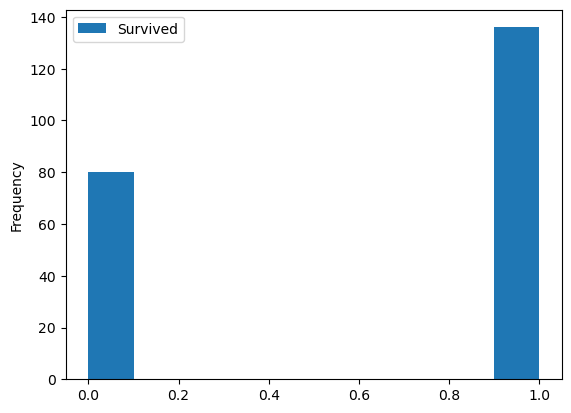

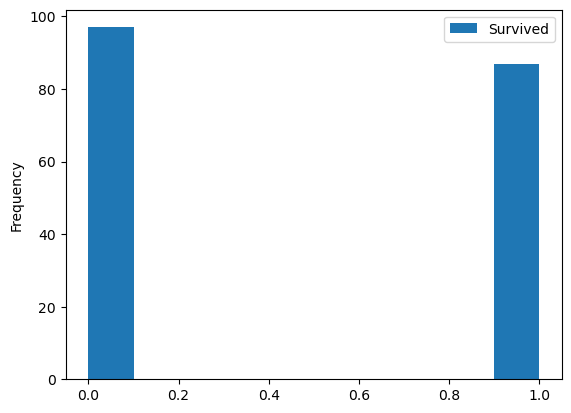

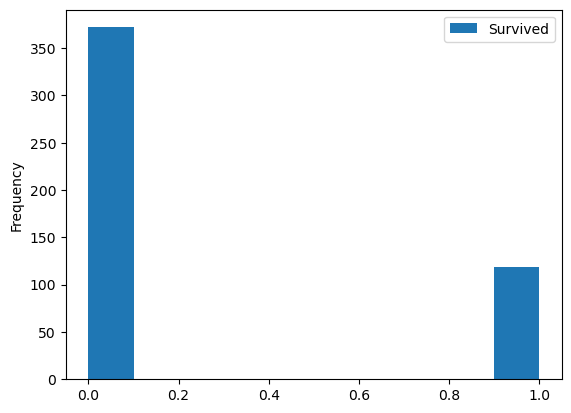

In [208]:
# bar를 쓰면 너무 많아서 쪼개져 보임
titanic.groupby('Pclass')[['Survived']].plot(kind='hist')

<Axes: xlabel='Pclass'>

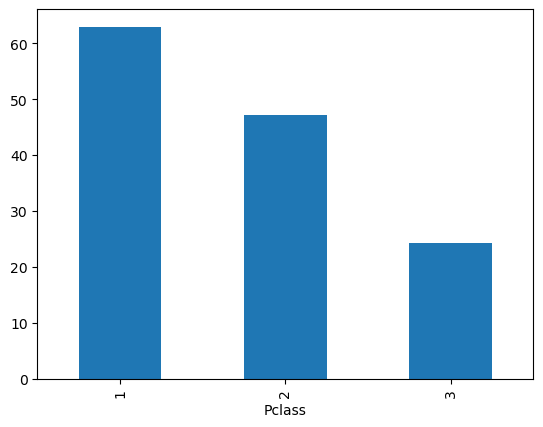

In [216]:
(titanic.groupby('Pclass')['Survived'].mean() * 100).plot(kind='bar')